In [2]:
# from pandas_datareader import data as web

In [3]:
# import datetime

In [4]:
# start = datetime.datetime(1998, 1, 1)
# end = datetime.datetime(2021, 12, 31)
# data = web.DataReader('DGS10', 'fred', start, end).dropna()

In [5]:
# data

In [6]:
# # Convert to monthly data
# monthly_data = data.resample('M').last()

# # Calculate monthly returns
# monthly_returns = (1 + monthly_data / 100) ** (1/12) - 1

# # Calculate cumulative returns
# cumulative_returns = (1 + monthly_returns).cumprod()

# # You might want to subtract 1 to get the cumulative return in percentage
# cumulative_returns = cumulative_returns - 1
# cumulative_returns

In [7]:
start = '1990-01-31'
end = '2021-12-31'

In [8]:
# pip install pandas_datareader

In [9]:
from pandas_datareader import data as web

In [10]:
import pandas as pd
# FRED에서 데이터 가져오기
leadingIndicator = pd.read_csv('./leadingIndicator.csv')  # monthly 지표
leadingIndicator = leadingIndicator.set_index('DATE')
leadingIndicator.index = pd.to_datetime(leadingIndicator.index)

vix = web.DataReader('VIXCLS', 'fred', start, end)

gdp_growth = web.DataReader('NAEXKP04USQ657S', 'fred', start, end)  # 분기별 실질 GDP 성장률

In [11]:
leadingIndicator

,USALOLITONOSTSAM
DATE,
1960-01-31,100.694793
1960-02-29,100.421437
1960-03-31,100.118775
1960-04-30,99.832664
1960-05-31,99.582618
...,...
2023-05-31,99.093665
2023-06-30,99.196542
2023-07-31,99.301570


In [12]:
vix = vix.resample('M').last()
vix

,VIXCLS
DATE,
1990-01-31,25.36
1990-02-28,21.99
1990-03-31,19.73
1990-04-30,19.52
1990-05-31,17.37
...,...
2021-08-31,16.48
2021-09-30,23.14
2021-10-31,16.26


In [13]:
gdp_growth

,NAEXKP04USQ657S
DATE,
1990-04-01,-1.878177
1990-07-01,-0.860479
1990-10-01,-1.868745
1991-01-01,-3.203971
1991-04-01,0.279720
...,...
2020-10-01,3.179833
2021-01-01,1.539630
2021-04-01,0.921680


In [14]:
gdp_growth_monthly = gdp_growth.resample('M').ffill(limit=3)  # 분기 데이터를 월별로 전달
gdp_growth_monthly

,NAEXKP04USQ657S
DATE,
1990-04-30,-1.878177
1990-05-31,-1.878177
1990-06-30,-1.878177
1990-07-31,-0.860479
1990-08-31,-0.860479
...,...
2021-06-30,0.921680
2021-07-31,-0.563895
2021-08-31,-0.563895


In [15]:
import pandas as pd

# indicator & vix & gdp 합치기
table = pd.concat([leadingIndicator, vix, gdp_growth_monthly], axis=1, join='inner')
table.columns = ['leadingIndicator', 'vix', 'gdp']
table = table['2003-01-01':]
table

,leadingIndicator,vix,gdp
DATE,,,
2003-01-31,98.024932,31.17,0.732600
2003-02-28,97.994586,29.63,0.732600
2003-03-31,98.026892,29.15,0.732600
2003-04-30,98.146137,21.21,1.949934
2003-05-31,98.346977,19.47,1.949934
...,...,...,...
2021-06-30,101.172892,15.83,0.921680
2021-07-31,101.129863,18.24,-0.563895
2021-08-31,101.067557,16.48,-0.563895


In [16]:
import matplotlib.pyplot as plt

In [17]:
# # leading indicator

# # leading indicator mean
# leadingIndicator_mean = table['leadingIndicator'].mean()

# # 구간을 저장할 리스트
# above_average_periods = []
# below_average_periods = []

# # 현재 구간의 시작 날짜와 끝 날짜를 추적하기 위한 변수 초기화
# current_start = None
# current_end = None
# current_status_above = None

# # 데이터프레임 순회
# for date, value in table['leadingIndicator'].items():
#     # 현재 상태가 설정되지 않았거나 상태가 변경된 경우
#     if current_status_above is None or (value > leadingIndicator_mean) != current_status_above:
#         # 현재 구간의 시작과 끝 날짜가 존재하는 경우, 리스트에 추가
#         if current_start is not None and current_end is not None:
#             if current_status_above:
#                 above_average_periods.append((current_start, current_end))
#             else:
#                 below_average_periods.append((current_start, current_end))

#         # 새로운 구간의 시작 날짜 설정
#         current_start = date
#         current_status_above = value > leadingIndicator_mean

#     # 현재 구간의 끝 날짜 업데이트
#     current_end = date

# # 마지막 구간 추가
# if current_status_above:
#     above_average_periods.append((current_start, current_end))
# else:
#     below_average_periods.append((current_start, current_end))


# # 결과 출력 - 평균 이상
# above_average = []
# for start, end in above_average_periods:
#     above_average.append(f"{start.strftime('%Y-%m-%d')} ~ {end.strftime('%Y-%m-%d')}")
# print("평균 이상인 구간:", above_average)

# # 결과 출력 - 평균 이하
# below_average = []
# for start, end in below_average_periods:
#     below_average.append(f"{start.strftime('%Y-%m-%d')} ~ {end.strftime('%Y-%m-%d')}")
# print("\n평균 이하인 구간:", below_average)

In [18]:
# # vix

# # 120일 이동평균 계산
# table['vix_120d_ma'] = table['gdp'].rolling(window=20).mean()

# # 구간을 저장할 리스트 초기화
# increasing_periods = []
# decreasing_periods = []

# # 현재 구간의 시작 날짜와 끝 날짜를 추적하기 위한 변수 초기화
# current_start = None
# current_end = None
# current_trend_increasing = None

# # 데이터프레임 순회
# for date, row in table.iterrows():
#     value = row['gdp']
#     moving_average = row['vix_120d_ma']
    
#     # 이동 평균과 비교
#     if moving_average is not None:
#         # 현재 상태가 설정되지 않았거나 상태가 변경된 경우
#         if current_trend_increasing is None or (value < moving_average) != current_trend_increasing:
#             # 현재 구간의 시작과 끝 날짜가 존재하는 경우, 리스트에 추가
#             if current_start is not None and current_end is not None:
#                 if current_trend_increasing:
#                     increasing_periods.append((current_start, current_end))
#                 else:
#                     decreasing_periods.append((current_start, current_end))

#             # 새로운 구간의 시작 날짜 설정
#             current_start = date
#             current_trend_increasing = value < moving_average

#         # 현재 구간의 끝 날짜 업데이트
#         current_end = date

# # 마지막 구간 추가
# if current_trend_increasing:
#     increasing_periods.append((current_start, current_end))
# else:
#     decreasing_periods.append((current_start, current_end))

# # 결과 출력 - 상승 구간
# increasing = []
# for start, end in increasing_periods:
#     increasing.append(f"{start.strftime('%Y-%m-%d')} ~ {end.strftime('%Y-%m-%d')}")
# print("상승 중인 구간:", increasing)

# # 결과 출력 - 하락 구간
# decreasing = []
# for start, end in decreasing_periods:
#     decreasing.append(f"{start.strftime('%Y-%m-%d')} ~ {end.strftime('%Y-%m-%d')}")
# print("\n하락 중인 구간:", decreasing)

In [19]:
# VIX
import pandas as pd
import pandas_datareader as web

# 데이터 불러오기
data = web.DataReader('VIXCLS', 'fred', start='1999-01-01', end='2022-12-31')
data = data.ffill()

# 이동평균 계산
data['MA_240'] = data['VIXCLS'].rolling(window=240).mean()
data['Trend'] = '상승'
data.loc[data['VIXCLS'] < data['MA_240'], 'Trend'] = '하락'

# 월별 데이터로 리샘플링 및 마지막 날짜 선택
data = data.resample('M').last()['2000-01-31':]

# 상승 및 하락에 따라 데이터 분리
df_up = data[data['Trend'] == '상승'].index
df_down = data[data['Trend'] == '하락'].index

# 리스트
df_up = (data[data['Trend'] == '상승'].index + pd.DateOffset(months=1)).strftime('%Y-%m').tolist()
df_down = (data[data['Trend'] == '하락'].index + pd.DateOffset(months=1)).strftime('%Y-%m').tolist()

In [20]:
# leading indicator

# 데이터 불러오기
data_eco = web.DataReader('USALOLITONOSTSAM', 'fred', start='2000-01-01', end='2022-12-31')
data_eco = data_eco.ffill()

# 이동평균 계산
data_eco['mean'] = data_eco['USALOLITONOSTSAM'].mean()
data_eco['Trend'] = '상승'
data_eco.loc[data_eco['USALOLITONOSTSAM'] < data_eco['mean'], 'Trend'] = '하락'

# 월별 데이터로 리샘플링 및 마지막 날짜 선택
data_eco = data_eco.resample('M').last()

# 상승 및 하락에 따라 데이터 분리
eco_up = data_eco[data_eco['Trend'] == '상승'].index
eco_down = data_eco[data_eco['Trend'] == '하락'].index

# 리스트
eco_up = (data_eco[data_eco['Trend'] == '상승'].index + pd.DateOffset(months=1)).strftime('%Y-%m').tolist()
eco_down = (data_eco[data_eco['Trend'] == '하락'].index + pd.DateOffset(months=1)).strftime('%Y-%m').tolist()

In [21]:
eco_down

['2000-12',
 '2001-01',
 '2001-02',
 '2001-03',
 '2001-04',
 '2001-05',
 '2001-06',
 '2001-07',
 '2001-08',
 '2001-09',
 '2001-10',
 '2001-11',
 '2001-12',
 '2002-01',
 '2002-02',
 '2002-03',
 '2002-04',
 '2002-05',
 '2002-06',
 '2002-07',
 '2002-08',
 '2002-09',
 '2002-10',
 '2002-11',
 '2002-12',
 '2003-01',
 '2003-02',
 '2003-03',
 '2003-04',
 '2003-05',
 '2003-06',
 '2003-07',
 '2003-08',
 '2003-09',
 '2003-10',
 '2008-08',
 '2008-09',
 '2008-10',
 '2008-11',
 '2008-12',
 '2009-01',
 '2009-02',
 '2009-03',
 '2009-04',
 '2009-05',
 '2009-06',
 '2009-07',
 '2009-08',
 '2009-09',
 '2009-10',
 '2009-11',
 '2009-12',
 '2010-01',
 '2010-02',
 '2010-03',
 '2010-04',
 '2010-05',
 '2010-06',
 '2010-07',
 '2010-08',
 '2010-09',
 '2010-10',
 '2010-11',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11',
 '2011-12',
 '2012-01',
 '2012-02',
 '2012-07',
 '2012-08',
 '2012-09',
 '2012-10',
 '2012-11',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '20

In [22]:
# # regime shift
# from datetime import datetime, timedelta

# # Function to shift dates by one month
# def shift_dates(date_ranges):
#     shifted_ranges = []
#     for date_range in date_ranges:
#         start_date_str, end_date_str = date_range.split(' ~ ')
#         start_date = datetime.strptime(start_date_str, '%Y-%m-%d') + pd.DateOffset(months=1) # Adding 30 days
#         end_date = datetime.strptime(end_date_str, '%Y-%m-%d') + pd.DateOffset(months=1)    # Adding 30 days
#         shifted_ranges.append(f'{start_date.strftime("%Y-%m-%d")} ~ {end_date.strftime("%Y-%m-%d")}')
#     return shifted_ranges

# above_average = shift_dates(above_average)
# below_average = shift_dates(below_average)
# increasing = shift_dates(df_up)
# decreasing = shift_dates(df_down)


In [23]:
print('평균 이상인 구간 :', eco_up)
print('평균 이하인 구간 :', eco_down)
print('상승 중인 구간 :', df_up)
print('하락 중인 구간 :', df_down)

평균 이상인 구간 : ['2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06', '2004-07', '2004-08', '2004-09', '2004-10', '2004-11', '2004-12', '2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06', '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2012-03', '2012-04', '2012-05', '2012-06', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10

In [24]:
all_period = sorted(list(set(eco_up + eco_down + df_up + df_down)))
all_period

['2000-02',
 '2000-03',
 '2000-04',
 '2000-05',
 '2000-06',
 '2000-07',
 '2000-08',
 '2000-09',
 '2000-10',
 '2000-11',
 '2000-12',
 '2001-01',
 '2001-02',
 '2001-03',
 '2001-04',
 '2001-05',
 '2001-06',
 '2001-07',
 '2001-08',
 '2001-09',
 '2001-10',
 '2001-11',
 '2001-12',
 '2002-01',
 '2002-02',
 '2002-03',
 '2002-04',
 '2002-05',
 '2002-06',
 '2002-07',
 '2002-08',
 '2002-09',
 '2002-10',
 '2002-11',
 '2002-12',
 '2003-01',
 '2003-02',
 '2003-03',
 '2003-04',
 '2003-05',
 '2003-06',
 '2003-07',
 '2003-08',
 '2003-09',
 '2003-10',
 '2003-11',
 '2003-12',
 '2004-01',
 '2004-02',
 '2004-03',
 '2004-04',
 '2004-05',
 '2004-06',
 '2004-07',
 '2004-08',
 '2004-09',
 '2004-10',
 '2004-11',
 '2004-12',
 '2005-01',
 '2005-02',
 '2005-03',
 '2005-04',
 '2005-05',
 '2005-06',
 '2005-07',
 '2005-08',
 '2005-09',
 '2005-10',
 '2005-11',
 '2005-12',
 '2006-01',
 '2006-02',
 '2006-03',
 '2006-04',
 '2006-05',
 '2006-06',
 '2006-07',
 '2006-08',
 '2006-09',
 '2006-10',
 '2006-11',
 '2006-12',
 '20

In [25]:
type(all_period[2])

str

In [26]:
recovery = []
expansion = []
slowdown = []
contraction = []

for i in all_period:
    if i in eco_down and i in df_down:
        # i = pd.datetime(i, format = '%Y-%m')
        recovery.append(i)
    if i in eco_up and i in df_down:
        expansion.append(i)
    if i in eco_up and i in df_up:
        slowdown.append(i)
    if i in eco_down and i in df_up:
        contraction.append(i)

In [27]:
print('recovery =', recovery)
print('expansion =', expansion)
print('slowdown =', slowdown)
print('contraction =', contraction)

recovery = ['2001-02', '2001-06', '2001-07', '2001-08', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06', '2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09', '2003-10', '2008-08', '2008-09', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-08', '2010-11', '2012-01', '2012-02', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2015-11', '2015-12', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-12', '2017-01', '2017-02', '2019-02', '2019-03', '2019-04', '2019-05', '2019-07', '2019-08', '2019-10', '2019-11', '2019-12', '2020-01', '2020-08', '2020-10', '2020-12', '2022-08', '2022-12', '2023-01']
expansion = ['2000-03', '2000-07', '2000-08', '2000-09', '2000-10', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06', '2004-07', '2004-08', '2004-09', '2004-10', '2004-12', '2005-0

In [28]:
# recovery_new = []
# expansion_new = []
# slowdown = []
# contraction = []

# def datetime_change(lst):
#     for i in lst:
#         pd.to_datetime(i, format = '&Y-&m')
type(table.index)       

pandas.core.indexes.datetimes.DatetimeIndex

In [29]:
table.index

DatetimeIndex(['2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31',
               ...
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31'],
              dtype='datetime64[ns]', name='DATE', length=226, freq='M')

In [30]:
# table.index = table.index.to_period('M')
table.index = table.index.strftime('%Y-%m')

# table에 regime 컬럼 추가
table['regime'] = 'Unknown'

# 각 국면에 따라 'regime' 값 설정
table.loc[table.index.isin(recovery), 'regime'] = 'Recovery'
table.loc[table.index.isin(expansion), 'regime'] = 'Expansion'
table.loc[table.index.isin(slowdown), 'regime'] = 'Slowdown'
table.loc[table.index.isin(contraction), 'regime'] = 'Contraction'

table

,leadingIndicator,vix,gdp,regime
DATE,,,,
2003-01,98.024932,31.17,0.732600,Contraction
2003-02,97.994586,29.63,0.732600,Contraction
2003-03,98.026892,29.15,0.732600,Contraction
2003-04,98.146137,21.21,1.949934,Recovery
2003-05,98.346977,19.47,1.949934,Recovery
...,...,...,...,...
2021-06,101.172892,15.83,0.921680,Expansion
2021-07,101.129863,18.24,-0.563895,Expansion
2021-08,101.067557,16.48,-0.563895,Expansion


In [31]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 2003-01 to 2021-10
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   leadingIndicator  226 non-null    float64
 1   vix               226 non-null    float64
 2   gdp               226 non-null    float64
 3   regime            226 non-null    object 
dtypes: float64(3), object(1)
memory usage: 8.8+ KB


In [32]:
# (pd.to_datetime(period)+ pd.DateOffset(months=1)).strftime('%Y-%m')

NameError: name 'period' is not defined

In [38]:
import matplotlib.dates as mdates

# # 위에서 제공된 리스트를 이용하여 datetime 범위로 파싱
# def parse_date_ranges(date_ranges):
#     return [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in (s.split(' ~ ') for s in date_ranges)]

# # 위에서 제공된 날짜 범위 문자열을 datetime 객체의 리스트로 파싱
# above_average_periods = parse_date_ranges(eco_up)
# below_average_periods = parse_date_ranges(eco_down)
# increasing_periods = parse_date_ranges(df_up)
# decreasing_periods = parse_date_ranges(df_down)

# # 국면을 정의하는 함수 (leading indicator, vix)
# def get_regime_periods(above, below, increasing, decreasing):
#     recovery = find_overlapping_periods(eco_down, df_down)  # 평균 이하 & 상승
#     expansion = find_overlapping_periods(eco_up, df_down) # 평균 이상 & 상승
#     slowdown = find_overlapping_periods(eco_up, df_up)  # 평균 이상 & 하강
#     contraction = find_overlapping_periods(eco_down, df_up) # 평균 이하 & 하강
#     return recovery, expansion, slowdown, contraction

# # 겹치는 기간을 찾는 함수
# def find_overlapping_periods(periods1, periods2):
#     overlapping = []
#     for start1, end1 in periods1:
#         for start2, end2 in periods2:
#             # 겹치는 기간 확인
#             latest_start = max(start1, start2)
#             earliest_end = min(end1, end2)
#             if latest_start <= earliest_end:
#                 overlapping.append((latest_start, earliest_end))
#     return overlapping

# # 국면별 기간을 얻기
# recovery_periods, expansion_periods, slowdown_periods, contraction_periods = get_regime_periods(eco_up, eco_down, df_up, df_down)

# GDP 데이터 가져오기
gdp_growth = table['gdp']
# # GDP 성장률 계산 (월간 기준)
# gdp_growth = gdp_data.resample('M').last().pct_change().dropna() * 100

# 그래프 생성 및 국면별 배경색 추가
fig, ax = plt.subplots(figsize=(15, 4))

# 국면별 색상 지정
color_map = {
    'Recovery': 'skyblue',
    'Expansion': 'blue',
    'Slowdown': 'pink',
    'Contraction': 'red'
}

# GDP 성장률 선 그래프 추가
ax.plot(gdp_growth.index, gdp_growth, color='darkblue', label='US Real GDP Growth y/y %', linewidth=2)

# # 국면 별로 배경색을 그래프에 추가
# for period in recovery:
#     ax.axvspan((pd.to_datetime(period).strftime('%Y-%m')), (pd.to_datetime(period)+ pd.DateOffset(days=30)).strftime('%Y-%m'), color=colors['Recovery'], alpha=0.5, label='Recovery' if 'Recovery' not in ax.get_legend_handles_labels()[1] else "")
# for period in expansion:
#     ax.axvspan((pd.to_datetime(period).strftime('%Y-%m')), (pd.to_datetime(period)+ pd.DateOffset(days=30)).strftime('%Y-%m'), color=colors['Expansion'], alpha=0.5, label='Expansion' if 'Expansion' not in ax.get_legend_handles_labels()[1] else "")
# for period in slowdown:
#     ax.axvspan((pd.to_datetime(period).strftime('%Y-%m')), (pd.to_datetime(period)+ pd.DateOffset(days=30)).strftime('%Y-%m'), color=colors['Slowdown'], alpha=0.5, label='Slowdown' if 'Slowdown' not in ax.get_legend_handles_labels()[1] else "")
# for period in contraction:
#     ax.axvspan((pd.to_datetime(period).strftime('%Y-%m')), (pd.to_datetime(period)+ pd.DateOffset(days=30)).strftime('%Y-%m'), color=colors['Contraction'], alpha=0.5, label='Contraction' if 'Contraction' not in ax.get_legend_handles_labels()[1] else "")

# 국면 별로 배경색을 그래프에 추가
for period in recovery:
    ax.axvspan(period[0], period[1], color=color_map['Recovery'], alpha=0.5, label='Recovery' if 'Recovery' not in ax.get_legend_handles_labels()[1] else "")
for period in expansion:
    ax.axvspan(period[0], period[1], color=color_map['Expansion'], alpha=0.5, label='Expansion' if 'Expansion' not in ax.get_legend_handles_labels()[1] else "")
for period in slowdown:
    ax.axvspan(period[0], period[1], color=color_map['Slowdown'], alpha=0.5, label='Slowdown' if 'Slowdown' not in ax.get_legend_handles_labels()[1] else "")
for period in contraction:
   


# # 범례 추가
# plt.figure(figsize=(15, 8))
# ax.legend()

# # 제목과 라벨 설정
# ax.set_title('Model-Predicted Business Cycle Regimes versus Realized GDP Growth')
# ax.set_xlabel('Year')
# ax.set_ylabel('GDP Growth Rate (%)')

# # x축을 연도로 표시
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


# # x축 라벨 각도 조절
# plt.xticks(rotation=45)

# # 그래프 표시
# plt.show()

colors = table['regime'].map(color_map)

# # 시각화
# fig, ax = plt.subplots(figsize=(14, 7))

# 바 차트로 기업 주기 국면 그리기
table['gdp'].plot(kind='bar', color=colors, ax=ax, width=1, edgecolor='none')

# 선 차트로 GDP 성장률 그리기
ax.plot(table.index, table['gdp'], color='black', linewidth=2)

# 축 레이블 설정
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('GDP Growth (%)', fontsize=12)

# 범례 설정
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color_map[key], label=key) for key in color_map]
ax.legend(handles=legend_elements, loc='upper left')

# 제목 설정
ax.set_title('Model-Predicted Business Cycle Regimes vs Realized GDP Growth', fontsize=14)

# 그리드 설정
ax.grid(True)

# x축의 레이블을 날짜 형식으로 변환하여 설정 (예: '2003-01')
ax.set_xticklabels([pd.to_datetime(date).strftime('%Y') for date in table.index])

# x축 레이블 각도 조정
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()


# 그림 표시
plt.show()


IndentationError: expected an indented block (4100772744.py, line 96)

In [ ]:
# 이게 최종

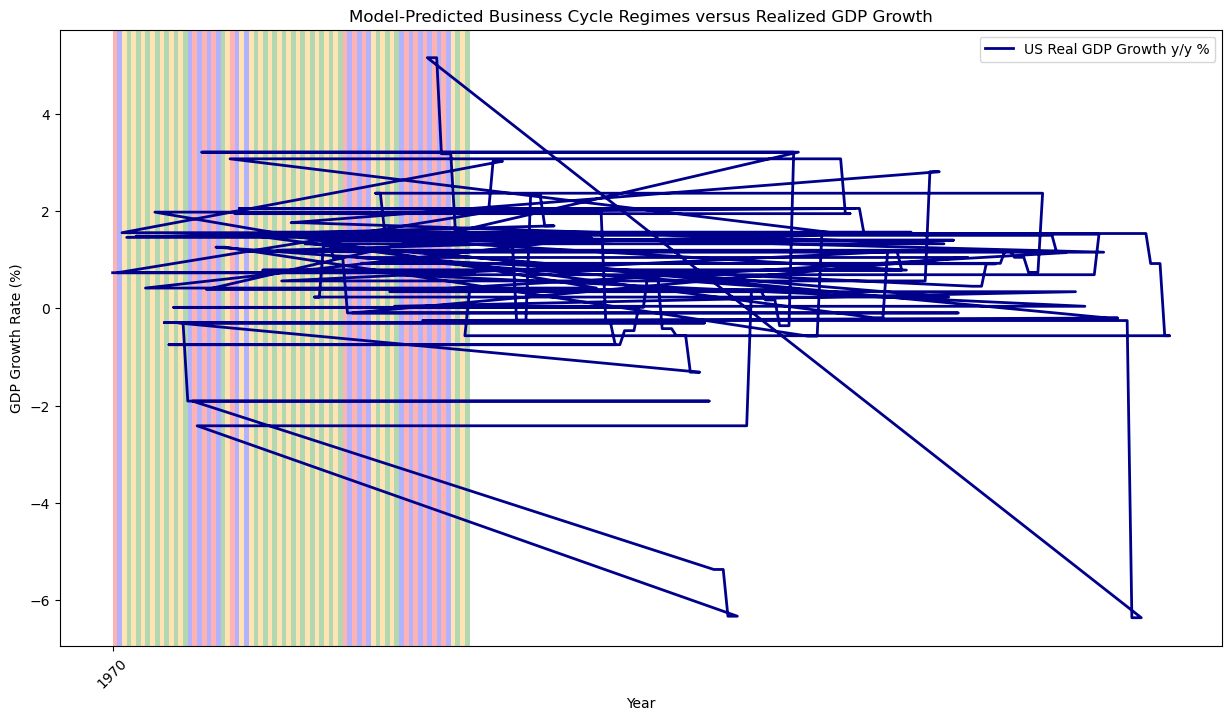

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import datetime
from matplotlib.patches import Patch
import matplotlib.dates as mdates


# 그래프를 그리기 위한 설정
plt.figure(figsize=(15, 8))
ax = plt.gca()

# 각 국면별 배경색 설정
background_colors = {
    'Recovery': 'blue',
    'Expansion': 'orange',
    'Slowdown': 'green',
    'Contraction': 'red'
}

# 범례를 위한 패치 리스트 생성
legend_patches = [Patch(color=color, label=regime) for regime, color in background_colors.items()]

data = table

# 국면이 바뀌는 지점을 찾습니다.
regime_changes = data['regime'].ne(data['regime'].shift()).cumsum()

# 각 국면에 대해 배경색을 칠합니다.
prev_end = None
for (regime, group_data) in data.groupby(regime_changes):
    start = prev_end if prev_end else group_data.index[0]
    end = group_data.index[-1] # 월말로 설정하여 겹치게 함
    # + pd.offsets.MonthEnd(1)  
    prev_end = end
    ax.axvspan(start, end, facecolor=background_colors[group_data['regime'].iloc[0]], alpha=0.3, lw=0)


# GDP 성장률 선 그래프 추가
ax.plot(gdp_growth.index, gdp_growth, color='darkblue', label='US Real GDP Growth y/y %', linewidth=2)

# 범례 추가
ax.legend()

# 제목과 라벨 설정
ax.set_title('Model-Predicted Business Cycle Regimes versus Realized GDP Growth')
ax.set_xlabel('Year')
ax.set_ylabel('GDP Growth Rate (%)')

# x축을 연도로 표시
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# x축 라벨 각도 조절
plt.xticks(rotation=45)

# 그래프 표시
plt.show()